# Non-signal data exercise

In this exercise you take on the role of a senior data analyst correcting mistakes made by a junior analyst. Your consulting company has received the MysteryData data set, and your goal is to build a classifier out of it, and evaluate how well the classifer works. You assigned the job to junior trainee Tux the Linux Penguin (who works for food).

Tux is very excited to work on the data and has produced very promising results. What Tux does not yet know is that MysteryData is actually just random non-signal data where the features x and the class label y are independent of each other - it is not possible to learn anything meaningful from this data. Tux has never taken any of the UTU data analytics courses and has not noticed this. You should help Tux to correct the analyses, so you do not end up reporting incorrect results to your customers.

You will write your answers inside this notebook. If all your answers are correct, your explanations thorough, and you solve the bonus questions, you will get a bonus point. Use written text, code, printouts or visualizations in you answers as needed. Return both this notebook filled (rename it lastname_firstname_studentid.ipynb), as well as a pdf export of the same notebook (same naming, but .pdf instead).

The analysed problem is a binary classification task. We will follow the convention of using +1 to represent the positive class, and -1 the negative. In all but one task we will use area under ROC curve (AUC) to evaluate how well the classifier predicts. For binary classification tasks AUC and c-index are equivalent, 0.5 means random performance and 1.0 perfect predictions. The "true" AUC you would expect to see on a large enough sample of independent test data for any classifier trained on non-signal data is 0.5.

Note that amount of samples, features, and class distribution for MysteryData can differ in different parts of the exercise (these are always written in comments above the code generating the data). Also, in one case there will be a data set on which it is possible to learn better than random classifier.

Some notes on the codes:
- we use predict_proba() instead of predict() when using AUC, because the predicted class probabilities are needed for computing AUC properly (predict() returns only +1/-1 values)
- random seeds are fixed to guarantee that re-running the codes gives same results

In [1]:
%matplotlib inline
import numpy as np

#The data, trust me, you can't learn anything useful from this
def load_mystery_data(samples, features, positives, random_seed):
    #samples: sample size
    #features: number of features
    #positives: number of positive examples, positives <= samples
    #random_seed: initializes the random generator
    assert positives <= samples
    rand_state = np.random.RandomState(random_seed)
    #values in X are from normal distribution, with zero mean, unit variance, zero covariance
    X = rand_state.randn(samples, features)
    #y is a randomly shuffled vector of +1 and -1 values
    y = np.hstack((np.ones(positives), -1.*np.ones(samples-positives)))
    y = rand_state.permutation(y)
    return X, y

# Part 1: some elementary mistakes

## Lesson 1.1: never trust your ----- set performance

The first analysis done by Tux contains an obvious elementary mistake.

In [2]:
#100 samples, 100 features, 50 belong to positive class
X, y = load_mystery_data(100, 100, 50, 2)

#I am going to try knn on my data!!!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


learner = KNeighborsClassifier(n_neighbors=2)
learner.fit(X, y)
#get the estimated probability of belonging to class 1
p = learner.predict_proba(X)[:,1]
auc = roc_auc_score(y, p)
print("I got area under ROC curve %f" % auc)
print('Tux: "I got very high AUC, problem solved!!"')

I got area under ROC curve 0.885600
Tux: "I got very high AUC, problem solved!!"


## Question 1.1
Why can't you trust the AUC result of Tux?

The reason we cant trust the AUC result of Tux is that this is a Non signal data and features are not related to target. 
Also, the Test set not isolated from the original dataset. 

## Write your answer to question 1.1 here

## Lesson 1.2: trivial baselines

The second analysis done by Tux is done a bit better, but analysis of results contains another elementary mistake.

In [3]:
#1000 samples, 100 features, 100 belong to positive class
#from sklearn.metrics import confusion_matrix
X, y = load_mystery_data(1000, 100, 100, 1)

#I am going to try knn on my data!!!
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
#Instead of AUC I will use classification accuracy!
from sklearn.metrics import accuracy_score

#Now I use a separate test set!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, stratify=y, random_state=1)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
p_test = knn.predict(X_test)
prob=knn.predict_proba(X_test)[:,1]
print (prob)


print(p_test)
accuracy = accuracy_score(y_test, p_test)
#conf_mat=confusion_matrix(y_test,p_test)
roc=roc_auc_score(y_test,prob)
#print(conf_mat)
print (roc)
print("Classification accuracy: %f" %accuracy)
print('Tux: "I got 90% classification accuracy, problem solved!!""')

[0.  0.1 0.  0.  0.1 0.1 0.  0.2 0.1 0.1 0.1 0.  0.2 0.3 0.3 0.1 0.2 0.1
 0.1 0.1 0.1 0.2 0.  0.1 0.  0.1 0.1 0.1 0.  0.1 0.1 0.  0.1 0.2 0.  0.1
 0.2 0.  0.2 0.  0.2 0.1 0.  0.2 0.  0.1 0.  0.2 0.2 0.2 0.1 0.  0.1 0.2
 0.1 0.2 0.  0.1 0.2 0.1 0.1 0.  0.1 0.1 0.1 0.  0.1 0.2 0.1 0.2 0.1 0.1
 0.  0.1 0.5 0.4 0.1 0.1 0.1 0.  0.2 0.2 0.1 0.1 0.  0.1 0.1 0.2 0.  0.1
 0.1 0.2 0.1 0.  0.1 0.2 0.3 0.  0.  0.3 0.3 0.  0.  0.  0.1 0.2 0.  0.1
 0.1 0.1 0.2 0.1 0.  0.1 0.  0.  0.  0.1 0.1 0.  0.1 0.  0.3 0.2 0.1 0.2
 0.1 0.1 0.1 0.2 0.1 0.3 0.1 0.1 0.1 0.2 0.1 0.  0.  0.2 0.  0.1 0.  0.1
 0.  0.1 0.1 0.  0.1 0.2 0.1 0.1 0.1 0.3 0.2 0.4 0.1 0.  0.  0.1 0.2 0.
 0.1 0.  0.1 0.1 0.  0.1 0.1 0.  0.  0.  0.1 0.1 0.  0.2 0.  0.1 0.2 0.
 0.2 0.  0.2 0.2 0.  0.1 0.1 0.1 0.  0.2 0.2 0.1 0.  0.1 0.1 0.3 0.2 0.2
 0.1 0.  0.3 0.1 0.1 0.2 0.1 0.  0.  0.  0.1 0.  0.2 0.  0.1 0.  0.1 0.
 0.  0.2 0.1 0.  0.  0.  0.  0.2 0.3 0.  0.2 0.2 0.  0.3 0.1 0.  0.2 0.2
 0.1 0.1 0.1 0.3 0.3 0.1 0.  0.1 0.1 0.3 0.1 0.2 0.  0

## Question 1.2
1. Does the high classification accuracy really mean that this is a good predictor?
2. Look at the test set predictions in p_test, what has this classifier actually learned?
3. What would the results look like if you used AUC instead of classification accuracy?

## Write your answer to question 1.2 here

1. No. Correspondingly the AUC should also be high
2. We can say looking at p_test, the classifier is classifying mostly the majority class. 
3. Since AUC is around 0,5, even though the accuracy is high, we cannot trust the result 

# Part 2: introduction to permutation tests

Next, we are using permutation tests to estimate, how likely we are to see AUC values as high as observed, if y is independent of x (non-signal data).

The test is implemented as follows:
- let AUC_original be the AUC obtained in the original analysis
- For 1000 (or preferably more if you have enough CPU time to use) repetitions, shuffle the labels in y, then run the analysis again and compute the AUC value. Store all 1000 AUC values in a list.
- Visualization: visualize the permutation distribution by plotting a histogram of the 1000 AUC values. Does AUC_original look like an outlier, or do you often get as good or better results with permuted class labels?
- p-value: relative fraction of runs, where obtained AUC $\geq$ AUC_original
- example: AUC with original class labeling is 0.6. In 70 runs out of 1000, we obtain as high as or larger AUC. p-value is then $\frac{70}{1000} = 0.07$ 
- result is considered statistically significant, if $p<\alpha$, where $\alpha$ a pre-specified significance level (often $\alpha=0.05$ or $\alpha=0.01$). Statistical significance does not mean that the results are good, only that the classifier has likely learned something from the data. In the following experiments, use $\alpha=0.05$.

## Lesson 2.1: sample size

Tux is now analyzing a small data set with 5-fold cross-validation. 

In [4]:
#20 samples, 10 features, 10 belong to positive class
X, y = load_mystery_data(20, 10, 10, 10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5)
cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
auc = np.mean(cv_aucs)
print("AUC: %f" %auc)
print('Tux: "I did proper cross-validation and got better than random results. My classifier learned something!!"')

AUC: 0.700000
Tux: "I did proper cross-validation and got better than random results. My classifier learned something!!"


## Question 2.1
Implement a permutation test for the above analysis, are these results statistically significant with $\alpha=0.05$? Provide both visualization of the permutation distribution, as well as the p-value.

Permuting and running
The result is not statistically significant


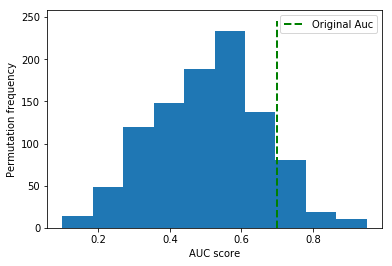

In [5]:
import matplotlib.pyplot as plt
np.random.shuffle(y)
aucperm=[]  #To store the AUC score after permutation
p_counts =  0
print ('Permuting and running')
for i in range (1000): #Permute 1000 times
    y = np.random.permutation(y)
    cv_aucs = [] #Each CV score.
    for train, test in cv.split(X, y):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc)
    
    auc = np.mean(cv_aucs)
    aucperm.append(auc)

    #check original auc with current auc
    if auc >= 0.7:
        p_counts+=1
    p_val=p_counts/1000
if p_val < 0.05:
    print ('Classifier learnt something from the data')
else:
    print ('The result is not statistically significant')
    
plt.figure()
axes=plt.gca()  

plt.hist(aucperm)
ylim=axes.get_ylim()
plt.xlabel('AUC score')
plt.ylabel('Permutation frequency')
plt.plot([.7,.7],ylim,'--g',linewidth=2,label='Original Auc') #0.7 is the auc obtained by Tux

plt.legend()
plt.show()

From the visualization we can see that the p value is greater than .7 and so the result is not statistically significant

## Lesson 2.2: sample size again

Let's give poor Tux a better data set that actually has clear difference between the classes and see how things work out. (on this data it is possible to obtain true AUC larger than 0.5)

In [6]:
def load_new_mystery_data(samples, features, positives, random_seed):
    #samples: sample size
    #features: number of positive examples, positives <= samples
    #random_seed: initializes the random generator
    assert positives <= samples
    rand_state = np.random.RandomState(random_seed)
    #values in X are from normal distribution, with zero mean, unit variance, zero covariance
    X_pos = rand_state.randn(positives, features)
    X_neg = rand_state.randn(samples-positives, features)+0.65
    X = np.vstack((X_pos, X_neg))
    #y is a randomly shuffled vector of +1 and -1 values
    y = np.hstack((np.ones(positives), -1.*np.ones(samples-positives)))
    I = rand_state.permutation(samples)
    X = X[I]
    y = y[I]
    return X, y


In [7]:
#20 samples, 10 features, 10 belong to positive class
X, y = load_new_mystery_data(20, 10, 10, 10)
print (y)
print (X)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

cv = StratifiedKFold(n_splits=5)
cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
cv_auc = np.mean(cv_aucs)
print("AUC: %f" %cv_auc)
print('Tux: "Not sure if I can trust the results anymore, my data set is really small! Please help me compute the p-value!!"')

[-1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.
 -1.  1.]
[[ 1.16071441  1.06429764  1.99454942  1.14351532  0.41299582  0.70728515
  -0.05707145  1.19666484  1.59250041 -2.32959677]
 [-1.97772828 -1.7433723   0.26607016  2.38496733  1.12369125  1.67262221
   0.09914922  1.39799638 -0.27124799  0.61320418]
 [-0.77088052 -0.02894677  1.18388481  1.3939744   2.87504964  0.76718142
   0.89461452  0.47270118  0.24427047  1.43177519]
 [ 0.07688664 -0.67044755  1.88620533  3.11532508  2.03323223  0.99623312
   1.67251611  0.81681027  2.30671662  1.31788961]
 [-0.23218226 -0.5017289   1.12878515 -0.69781003 -0.08112218 -0.52929608
   1.04618286 -1.41855603 -0.36249918 -0.12190569]
 [ 0.42005336 -0.47955119  0.0100374   0.96383052 -0.57583598  0.42820686
   1.98992631  0.67930971  2.63538575  2.0971656 ]
 [ 0.94294072  0.17919275  3.05432561 -0.08935674  0.33717124  0.30111808
   0.21097376  0.79110417  0.92304932 -0.96857075]
 [ 0.36237059 -0.70931057  0.60195867  0.1

Classifier learnt something from the data


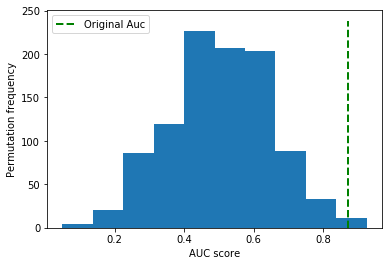

0.003


In [8]:
import matplotlib.pyplot as plt
np.random.shuffle(y)
aucperm=[] #CV scores 
p_counts =  0 #Probability count
for i in range (1000):
    y = np.random.permutation(y)
    cv_aucs = []
    for train, test in cv.split(X, y):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc)
    
    auc = np.mean(cv_aucs)
    aucperm.append(auc)

    #check original auc with current auc
    if auc >= 0.87:
        p_counts+=1
    p_val=p_counts/1000
if p_val < 0.05:
    print ('Classifier learnt something from the data')
else:
    print ('The result is not statistically significant')
    
plt.figure()
axes=plt.gca()  
#plt.plot([],aucperm,label='Actual AUC')

plt.hist(aucperm)
ylim=axes.get_ylim()
plt.xlabel('AUC score')
plt.ylabel('Permutation frequency')
plt.plot([.87,.87],ylim,'--g',linewidth=2,label='Original Auc')

plt.legend()
plt.show()
print (p_val)

## Question 2.2
Implement a permutation test for the above analysis, are these results statistically significant with $\alpha=0.05$? Provide both visualization of the permutation distribution, as well as the p-value.



Here we can see that p value is less than the alpha. So the model is likely to have learnt better than before 

# Part 3: mis-using feature selection

Here is a very simple correlation based feature selection method

In [9]:
from scipy.stats import kendalltau

def select(X, Y, scount):
    #select scount features from X with highest correlation with Y
    correlations = []
    for i in range(X.shape[1]):
        corr = kendalltau(X[:,i], Y)[0]

        correlations.append(np.abs(corr))
    correlations = np.array(correlations)
    I = np.argsort(correlations)
    #break
    I = I[::-1]

    return X[:,I[:scount]]


In [10]:
#50 samples, 1000 features, 25 belong to positive class
X, y = load_mystery_data(50, 1000, 25, 1)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


cv = StratifiedKFold(n_splits=5)
cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
cv_auc = np.mean(cv_aucs)
print('Tux: "My CV-AUC before feature selection is %f"' %cv_auc)


#I'm going to improve my AUC with feature selection!!!
X_fs = select(X, y, 5)
cv_aucs = []
for train, test in cv.split(X_fs, y):
    X_train = X_fs[train]
    y_train = y[train]
    X_test = X_fs[test]
    y_test = y[test]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
cv_auc = np.mean(cv_aucs)
print('Tux: "My CV-AUC after feature selection is %f, it really works!!"' %cv_auc)

Tux: "My CV-AUC before feature selection is 0.496000"
Tux: "My CV-AUC after feature selection is 0.808000, it really works!!"


## Question 3.1

Use permutation test to show Tux that the feature selection based classification approach is actually not learning anything from the data ($\alpha=0.05$, provide both visualization of the permutation distribution, as well as the p-value). Running the test may take a while. Analyse what is going on here, why did the results look so good?

The result is not statistically significant


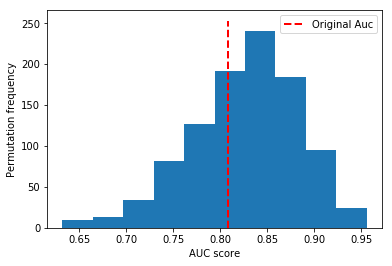

0.671


In [11]:
import matplotlib.pyplot as plt
import numpy as np
np.random.shuffle(y)
aucperm=[]  #To store the auc scores for each permutation. 
p_counts =  0


for i in range (1000):
    y = np.random.permutation(y)
    X_fs = select(X, y, 5)

    cv_aucs = []
    for train, test in cv.split(X_fs, y):
        X_train = X_fs[train]
        y_train = y[train]
        X_test = X_fs[test]
        y_test = y[test]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc)
    
    auc = np.mean(cv_aucs)
    aucperm.append(auc)

    #check original auc with current auc
    if auc >= 0.808:
        p_counts+=1
    p_val=p_counts/1000 #fraction of permuted tests greater than original auc
if p_val < 0.05:
    print ('Classifier learnt something from the data')
else:
    print ('The result is not statistically significant')
    
plt.figure()
axes=plt.gca()  

plt.hist(aucperm)
ylim=axes.get_ylim()
plt.xlabel('AUC score')
plt.ylabel('Permutation frequency')
plt.plot([.808,.808],ylim,'--r',linewidth=2,label='Original Auc')

plt.legend()
plt.show()
print (p_val)

Here we do the feature selection before CV. Since the p value obtained is greater than alpha value, we conclude that the result is not statistically significant. 
Tux had done feature selection before CV, which is not reliable approach. 

## Question 3.2 (bonus exercise)

Correct the bias in above example by combining feature selection properly with cross-validation, run the experiment again. Do also a permutation test for this experiment with as many permutations as you can afford in a reasonable amount of time.

In [12]:
def select_index(X,Y,scount):

    #select scount features from X with highest correlation with Y
    correlations = []
    for i in range(X.shape[1]):
        corr = kendalltau(X[:,i], Y)[0]

        correlations.append(np.abs(corr))
    correlations = np.array(correlations)
    I = np.argsort(correlations)
    #break
    I = I[::-1] ##Take indexes of only the highest correlated features. 

    return I[:scount]

0.492
The result is not statistically significant


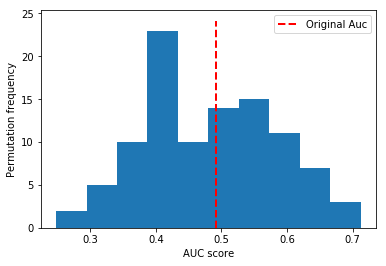

0.46


In [23]:
import matplotlib.pyplot as plt
import numpy as np
#np.random.shuffle(y)
aucperm=[]
run_counts =  0

X, y = load_mystery_data(50, 1000, 25, 1)

cv_aucs = []
for train, test in cv.split(X, y):
    X_train = X[train]
    y_train = y[train]
    X_test = X[test]
    y_test = y[test]
        
    #Column index for selected features
    index=select_index(X_train,y_train,5)
    X_train=X_train[:,index]#for the CV (5 only)
    X_test=X_test[:,index]
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train, y_train)
    p_test = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, p_test)
    cv_aucs.append(auc)
    
auc = np.mean(cv_aucs)
print (auc)


for i in range (100):
    y = np.random.permutation(y)
    #X_fs = select(X, y, 5)

    cv_aucs = []
    for train, test in cv.split(X, y):
        X_train = X[train]
        y_train = y[train]
        X_test = X[test]
        y_test = y[test]
        
        #Column index for selected features
        index=select_index(X_train,y_train,5)
        X_train=X_train[:,index]#for the CV
        X_test=X_test[:,index]
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)
        p_test = knn.predict_proba(X_test)[:,1] #probability for class 1 (positive)
        auc_p = roc_auc_score(y_test, p_test)
        cv_aucs.append(auc_p)
    
    auc_p = np.mean(cv_aucs)
    aucperm.append(auc_p)

    #compare auc of permuted test and without permuted
    if auc_p >= auc:
        run_counts+=1
    p_val=run_counts/100 #fraction of permuted tests greater than original auc
    
#Checking significant threshold
if p_val < 0.05:
    print ('Classifier learnt something from the data')
else:
    print ('The result is not statistically significant')
    
plt.figure()
axes=plt.gca()  

plt.hist(aucperm)
ylim=axes.get_ylim()
plt.xlabel('AUC score')
plt.ylabel('Permutation frequency')
plt.plot([auc,auc],ylim,'--r',linewidth=2,label='Original Auc')

plt.legend()
plt.show()
print (p_val)



When we try CV without permutation, we get the auc score around 0,5. With permutation, we can see that the model cannot learn well from the data. 